In [4]:
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import re

In [23]:
# Load the Excel file
file_path = '/Sample.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,QuestionId,AcceptedAnswerId,QuestionBody,QuestionTitle,QuestionTags,QuestionPostTypeId,QuestionOwnerUserId,QuestionScore,AnswerId,AnswerBody,AnswerTitle,AnswerTags,AnswerPostTypeId,AnswerOwnerUserId,AnswerScore,UserId,Reputation,UpVotes,DownVotes,Views
0,32921922,32924584,<p>What are the names of the trigonometric fun...,How to use trigonometry in Scheme?,<scheme><trigonometry>,1,5223757.0,0,32924584,<p>The Scheme standards define six trigonometr...,NaN,NaN,2,13,4,13,220982,5212,210,46020
1,32800446,32802138,<p>I've checked out the docs for this on docs....,Javascript-esq random floating point number 0-...,<random><floating-point><racket>,1,2124732.0,0,32802138,"<p>Yes, just use <code>(random)</code>. Exampl...",NaN,NaN,2,13,3,13,220982,5212,210,46020
2,32751289,32751306,"<p>I'm new to java, I'm trying to select shape...",I have an error with my if statement,<java><swing>,1,3785208.0,-1,32751306,<p>(Style nit: your <code>design</code> class ...,NaN,NaN,2,13,0,13,220982,5212,210,46020
3,32724801,32724854,<p>How is even possible to .NET's P/invoke cal...,How p/invoke call function using only but C++ ...,<c#><c++><c++-cli><mingw><pinvoke>,1,800123.0,-1,32724854,<p>You <em>can</em> use <code>GetProcAddress</...,NaN,NaN,2,13,1,13,220982,5212,210,46020
4,32717174,32717341,<p>I am encountering a problem trying to repla...,Two equal strings representing whitespaces not...,<javascript><string><numbers><locale>,1,2550819.0,4,32717341,"<p>In my testing, the separator character is a...",NaN,NaN,2,13,1,13,220982,5212,210,46020


In [24]:
# Function to remove HTML tags from the text
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply the cleaning function to the QuestionBody
data['QuestionBody'] = data['QuestionBody'].apply(clean_html)
data['AnswerBody'] = data['AnswerBody'].apply(clean_html)

# Display the cleaned question bodies and the associated user IDs
data[['QuestionBody', 'AnswerOwnerUserId', 'AnswerBody']].head()


,QuestionBody,AnswerOwnerUserId,AnswerBody
0,What are the names of the trigonometric functi...,13,The Scheme standards define six trigonometric ...
1,I've checked out the docs for this on docs.rac...,13,"Yes, just use (random). Example usages:\n> (ra..."
2,"I'm new to java, I'm trying to select shape us...",13,(Style nit: your design class should be named ...
3,How is even possible to .NET's P/invoke call a...,13,You can use GetProcAddress in C++ and invoke d...
4,I am encountering a problem trying to replace ...,13,"In my testing, the separator character is actu..."


In [25]:

# Concatenar QuestionBody y AnswerBody para un análisis conjunto
data['TextoCompleto'] = data['QuestionBody'] + ' ' + data['AnswerBody']

# Lista de lenguajes de programación para buscar (extensible)
lenguajes = ['Python', 'JavaScript', 'Java', 'C#', 'C++', 'PHP', 'Swift', 'Ruby', 'Kotlin']

# Inicializar un diccionario para contar menciones de cada lenguaje
conteo_lenguajes = {lenguaje: 0 for lenguaje in lenguajes}


In [28]:
# Función para contar menciones de lenguajes de programación
def contar_lenguajes(texto):
    for lenguaje in lenguajes:
        if lenguaje.lower() in texto.lower():
            conteo_lenguajes[lenguaje] += 1


In [29]:
# Aplicar la función de conteo a cada fila del DataFrame
data['TextoCompleto'].apply(contar_lenguajes)

# Convertir el diccionario de conteo en un DataFrame para su visualización
conteo_df = pd.DataFrame(list(conteo_lenguajes.items()), columns=['Lenguaje', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Análisis de tópicos
n_topicos = 5 # Ajustable según necesidad
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data['TextoCompleto'])
lda = LatentDirichletAllocation(n_components=n_topicos, random_state=0)
lda.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=0)

In [30]:
# Función para mostrar los tópicos
def mostrar_topicos(modelo, caracteristicas, n_palabras):
    for index, topic in enumerate(modelo.components_):
        print(f'Tópico {index}:')
        print(" ".join([caracteristicas[i] for i in topic.argsort()[-n_palabras:]]))


In [31]:
data.head()

,QuestionId,AcceptedAnswerId,QuestionBody,QuestionTitle,QuestionTags,QuestionPostTypeId,QuestionOwnerUserId,QuestionScore,AnswerId,AnswerBody,...,AnswerTags,AnswerPostTypeId,AnswerOwnerUserId,AnswerScore,UserId,Reputation,UpVotes,DownVotes,Views,TextoCompleto
0,32921922,32924584,What are the names of the trigonometric functi...,How to use trigonometry in Scheme?,<scheme><trigonometry>,1,5223757.0,0,32924584,The Scheme standards define six trigonometric ...,...,NaN,2,13,4,13,220982,5212,210,46020,What are the names of the trigonometric functi...
1,32800446,32802138,I've checked out the docs for this on docs.rac...,Javascript-esq random floating point number 0-...,<random><floating-point><racket>,1,2124732.0,0,32802138,"Yes, just use (random). Example usages:\n> (ra...",...,NaN,2,13,3,13,220982,5212,210,46020,I've checked out the docs for this on docs.rac...
2,32751289,32751306,"I'm new to java, I'm trying to select shape us...",I have an error with my if statement,<java><swing>,1,3785208.0,-1,32751306,(Style nit: your design class should be named ...,...,NaN,2,13,0,13,220982,5212,210,46020,"I'm new to java, I'm trying to select shape us..."
3,32724801,32724854,How is even possible to .NET's P/invoke call a...,How p/invoke call function using only but C++ ...,<c#><c++><c++-cli><mingw><pinvoke>,1,800123.0,-1,32724854,You can use GetProcAddress in C++ and invoke d...,...,NaN,2,13,1,13,220982,5212,210,46020,How is even possible to .NET's P/invoke call a...
4,32717174,32717341,I am encountering a problem trying to replace ...,Two equal strings representing whitespaces not...,<javascript><string><numbers><locale>,1,2550819.0,4,32717341,"In my testing, the separator character is actu...",...,NaN,2,13,1,13,220982,5212,210,46020,I am encountering a problem trying to replace ...


Tópico 0:
data want file like user code error using use function
Tópico 1:
android 38 27 02 java 20 09 2015 key data
Tópico 2:
object class new file like use code function list array
Tópico 3:
value li type class input var text div td _x000d_
Tópico 4:
class time code return public int end value new string


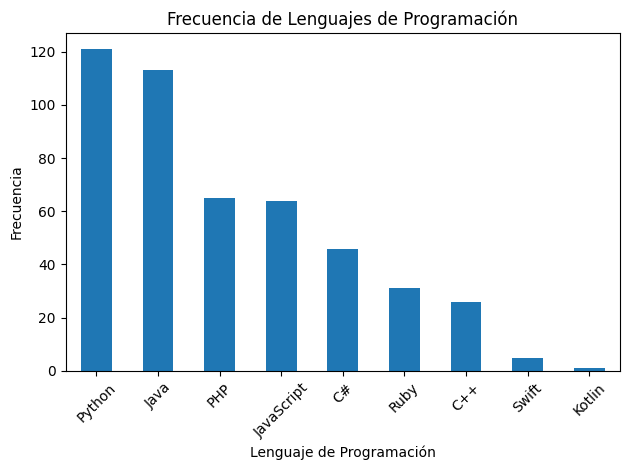

In [32]:
mostrar_topicos(lda, cv.get_feature_names_out(), 10)

# Graficar el conteo de menciones de lenguajes de programación
conteo_df.plot(kind='bar', x='Lenguaje', y='Frecuencia', legend=None, title='Frecuencia de Lenguajes de Programación')
plt.xlabel('Lenguaje de Programación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta la disposición para evitar la superposición de etiquetas
plt.show()


In [17]:
pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [19]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [33]:
df = pd.DataFrame(data)

# Inicializar el modelo
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generar embeddings para cada pregunta
question_embeddings = model.encode(df['QuestionBody'].tolist())


In [35]:
# Función para encontrar las preguntas más similares y mostrar los resultados de manera organizada
def find_similar_questions(query, embeddings, top_n=5):
    query_embedding = model.encode([query])
    similarities = cosine_similarity(query_embedding, embeddings)
    top_indices = np.argsort(similarities[0])[::-1][:top_n]
    similar_questions_df = df.iloc[top_indices][['AnswerOwnerUserId', 'QuestionBody']]
    return similar_questions_df

In [36]:
# Example usage
query = "How do I center a div"
similar_questions = find_similar_questions(query, question_embeddings)
print(similar_questions)


# Mostrar los resultados de manera organizada
print("Preguntas más similares:")
print(similar_questions.to_string(index=False))

     AnswerOwnerUserId                                       QuestionBody
115                371  How do I\n\nvertically center an image (crop t...
508               1946  What I am trying to achieve is a container wit...
344               1324  Below you can see my code. It seems that the f...
373               1324  I have two divs with child elements, I wish to...
384               1324  I am trying to get the counterpart to selected...
Preguntas más similares:
 AnswerOwnerUserId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 